# And thus begins the quest for the Golden Food Truck

Welcome! As you embark in your adventure, you start as a humble sous-chef. The head chef has fired the previous sous-chef because of their many mistakes 😬 So it is your job to fix them.

All cells in this notebook have a bug unless otherwise noted. Your task is to find and fix as many bugs as you can. Please fix the bugs in order. To get points for a cell, you need to have fixed all previous cells.

## Food inventory 1.0 (base Python 101)

Create a food inventory and print the different foods and their cost.

In [ ]:
# Create a list of fruits
fruits = ["apple", "banana", "orange"]

# Create a tuple of quantities for each fruit
quantities = (5, 3, 8)

# Create a dictionary that maps each fruit to its price per unit
prices = {"apple": 1.25, "banana": 0.75, "orange": 1.00}

The bug is a missing comma in the dictionary in the student version.

In [ ]:
# Create a function that calculates the total cost of a fruit order and returns such a value
def calculate_total_cost(quantity, price_per_unit):
  '''
  Function to calculate total cost.
  '''
  return quantity * price_per_unit

The bug is that the student version is printing, not returning a value.

In [ ]:
# Use a list comprehension to calculate and store the total cost for each fruit
total_costs = [calculate_total_cost(quantities[i], prices[fruit]) for i, fruit in enumerate(fruits)]

The student version has the `i` and `fruit` the other way around: `quantities[fruit], prices[i]`.

In [ ]:
# Create a tuple that combines the fruits with their total costs
inventory = zip(fruits, total_costs)

# Print a message for each item in the inventory
for item, cost in inventory:
  print(f"The total cost of {quantities[fruits.index(item)]} {item}s is ${cost:.2f}.")

The total cost of 5 apples is $6.25.
The total cost of 3 bananas is $2.25.
The total cost of 8 oranges is $8.00.


The student version missed the `f` after `print(`.

## Food analytics 1.0 (key Python libraries 101)

Create a data frame of foods, explore it, and create a model to predict calories.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Creating a dataset
data = {
    'food': ['apple', 'banana', 'orange', 'grape', 'carrot'],
    'calories': [52, 96, 47, 69, 41],
    'protein': [0.3, 1.3, 1.0, 0.6, 0.9],
    'fat': [0.2, 0.3, 0.2, 0.2, 0.2]
    }

df = pd.DataFrame(data)

# Print descriptive statistics
df.describe()

,calories,protein,fat
count,5.000000,5.000000,5.000000
mean,61.000000,0.820000,0.220000
std,22.169799,0.383406,0.044721
min,41.000000,0.300000,0.200000
25%,47.000000,0.600000,0.200000
50%,52.000000,0.900000,0.200000
75%,69.000000,1.000000,0.200000
max,96.000000,1.300000,0.300000


The student version has `import pandas` not `as pd`.

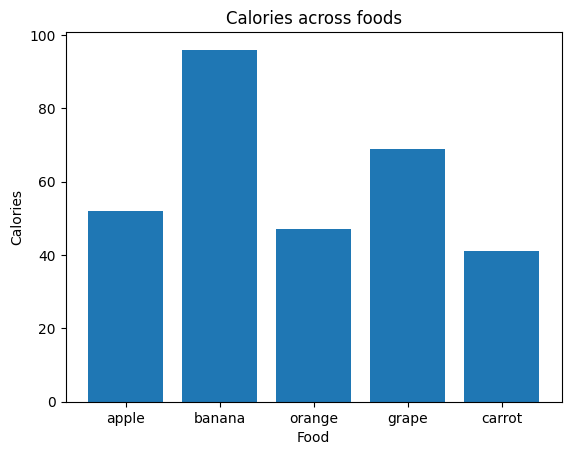

In [ ]:
# Create a bar chart comparing the calories of each food
plt.bar(df['food'], df['calories'])
plt.title('Calories across foods')
plt.xlabel('Food')
plt.ylabel('Calories')
plt.show()

The student version has `food` and `calories` without quotation marks.

In [ ]:
# Calculate the correlation between protein and calories
print(f"\nCorrelation between protein and calories: {df['protein'].corr(df['calories']):.2f}")


Correlation between protein and calories: 0.46


The student version has `data` instead of `df`.

In [ ]:
# Fit a linear regression model
# Hint: You may want to review what .fit(): https://www.sharpsightlabs.com/blog/sklearn-fit/
model = LinearRegression().fit(df[['protein']].values, df['calories'])

The student version as `df['protein']` instead of `df[['protein']]`.

In [ ]:
# Predict the calories for a new food
new_protein = 1.5
print(f"\nPredicted calories for a new food with {new_protein} grams of protein: {model.predict([[new_protein]])[0]:.2f}")


Predicted calories for a new food with 1.5 grams of protein: 79.04


The student version misses the `[0]`.

## Food inventory 2.0 (base Python 102)

Create a food inventory manager. <br>
The cells with tests don't have bugs. The tests are meant to help you make sure that you're getting the expected behaviors.

In [ ]:
# Create a class for foods
class Food:
  def __init__(self, name, quantity, shelf_life):
    self.name = name
    self.quantity = quantity
    self.shelf_life = shelf_life

  def is_expired(self, current_day):
    return current_day > self.shelf_life # Returns True if the food item is expired based on the current day

The student version as `quantity = quantity` above `def __init__`.

In [ ]:
# THIS CELL DOESN'T HAVE A BUG
# Testing Food

# Creating foods
food_1 = Food("Apple", 10, 7)
food_2 = Food("Milk", 2, 3)
food_3 = Food("Bread", 1, 10)

# Testing that the foods are of class Food
assert isinstance(food_1, Food)
assert isinstance(food_2, Food)
assert isinstance(food_3, Food)

# Testing that is_expired works as expected
assert not food_1.is_expired(0)
assert not food_2.is_expired(3)
assert food_3.is_expired(11)

In [ ]:
# Create a class for inventory manager
class InventoryManager:
  def __init__(self):
    self.inventory = []

  def get_total_quantity(self):
    return sum(food.quantity for food in self.inventory) # total quantity of all foods in the inventory

  def add_food(self, food):
    self.inventory.append(food)

  def remove_expired_foods(self, current_day, index = 0):
    if index < len(self.inventory):
      if self.inventory[index].is_expired(current_day):
        del self.inventory[index]
        # Continue with current index since the first food was deleted
        return self.remove_expired_foods(current_day, index)
      else:
        # Move on to next food
        return self.remove_expired_foods(current_day, index + 1)
    else:
      return

The student version misses the `+ 1` in `self.remove_expired_foods(current_day, index + 1)`.

In [ ]:
# THIS CELL DOESN'T HAVE A BUG
# Testing InventoryManager

# Creating inventory manager
inventory_manager = InventoryManager()

# Testing that the inventory manager is of class InventoryManager
assert isinstance(inventory_manager, InventoryManager)

# Testing get_total_quantity on empty inventory
assert inventory_manager.get_total_quantity() == 0, "inventory_manager should be empty"

# Adding food
inventory_manager.add_food(food_1)
inventory_manager.add_food(food_2)
inventory_manager.add_food(food_3)

# Testing add_food works as expected with get_total_quantity
assert inventory_manager.get_total_quantity() == 13, "Total quantity is incorrect"

# Remove expired items at day 5
inventory_manager.remove_expired_foods(5)

# Testing remove_expired_foods works as expected with get_total_quantity
assert inventory_manager.get_total_quantity() == 11, "Updated total quantity is incorrect"

## Food analytics 2.0 (key Python libraries 102)

Scrape the Wikipedia article about food and start exploring what it's talking about.<br>
The next cell doesn't have a bug. **Please run it only once.** That cell is scraping the Wikipedia article. We don't want to make too many requests to Wikipedia.

In [ ]:
# THIS CELL DOESN'T HAVE A BUG
# PLEASE RUN THIS CELL ONLY ONCE! NO NEED TO KEEP MAKING REQUESTS TO WIKIPEDIA

# Importing libraries
import requests
from bs4 import BeautifulSoup
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt

# Loading stop words
nltk.download('stopwords')
stop_words = stopwords.words('english') + ['food']

# Loading language model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Requesting Wikipedia article about food
response = requests.get("https://en.wikipedia.org/wiki/Food")

# Parsing HTML content
soup = BeautifulSoup(response.text, 'html.parser')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Get all paragraphs
# Hint: you may want to make sure you're getting the correct HTML tag: https://www.w3schools.com/tags/
paragraphs = soup.find_all('p')

The student version as `h2` instead of `p`.

In [ ]:
# Concatenate text from all paragraphs
# Hint: you may want to use get_text: https://www.educative.io/answers/how-to-use-gettext-in-beautiful-soup
text = ' '.join([p.get_text() for p in paragraphs])

The student version doesn't have `get_text()`.

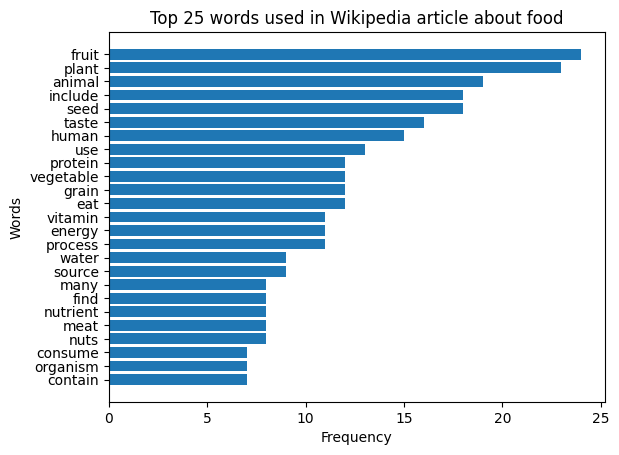

In [ ]:
# Turn text to lower case
text = text.lower()

# Tokenize text
words = RegexpTokenizer(r'\w+').tokenize(text)

# Remove numbers and stop words
words = [word for word in words if not word.isdigit() and word not in stop_words]

# Lemmatize words
# Hint: you may want to take a look at lemma_: https://spacy.io/api/token
words = [token.lemma_ for token in nlp(' '.join(words))]

# Count the occurrences of each word and get the top 25 words and their counts
word_counts = Counter(words).most_common(25)[::-1]
top_words, counts = zip(*word_counts)

# Plot word frequency
plt.barh(range(len(top_words)), counts, tick_label = top_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 25 words used in Wikipedia article about food')
plt.show()

The student version doesn't have `.lemma_`.